In [1]:
import pandas as pd
import seaborn as sns
import subprocess

In [3]:
answers = pd.read_excel(
    "../data/Combined_cleaned_responses_anon.xlsx", index_col=0, sheet_name=None, na_values="x"
)


# Counts of expert answers for each endpoint

Text(0.01, 0.93, 'A')

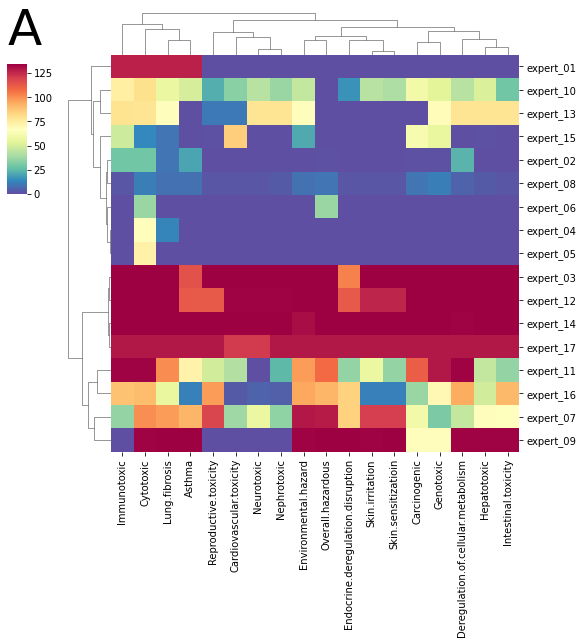

In [4]:
answer_counts = pd.DataFrame({k: v.notna().sum(axis=0) for k,v in answers.items()})
g = sns.clustermap(
    answer_counts.T, cmap="Spectral_r", method="complete", figsize=(9, 9),
    dendrogram_ratio=(0.1, 0.1),
)
g.figure.subplots_adjust(left=0.1, right=0.8)
g.ax_cbar.set_position((0.01, 0.7, 0.03, 0.2))
g.figure.text(0.01, 0.93, 'A', fontsize=50, transform=g.figure.transFigure)


# Counts of expert answers for each ENM and edpoint

Text(0.01, 0.93, 'B')

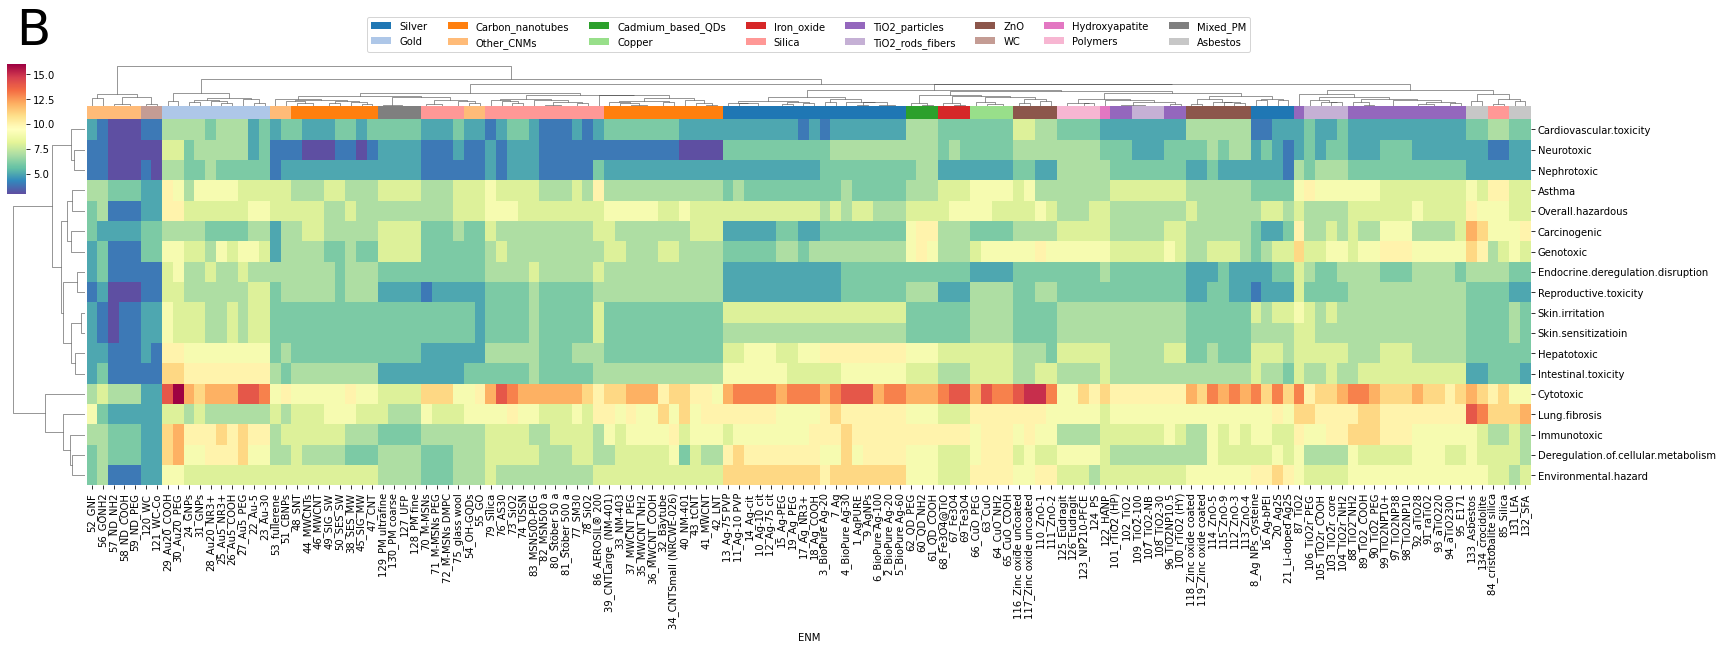

In [7]:
all_counts = 0
for e in answers.keys():
    all_counts += answers[e].notna()
groups = pd.read_csv("../data/enms_grouping.txt", sep="\t", index_col=0, header=None)
color_lut = dict(zip(groups[1].unique(), sns.color_palette("tab20")))
group_colors = pd.Series(groups[1]).map(color_lut)
clustermap = sns.clustermap(all_counts.T,
    cmap="Spectral_r",
    method="complete",
    figsize=(24, 9),
    dendrogram_ratio=(0.05, 0.1),
    col_colors=group_colors,
    xticklabels=1
)

for g in groups[1].unique():
    clustermap.ax_col_dendrogram.bar(
        0, 0, color=color_lut[g], label=g, linewidth=0
    )
clustermap.ax_col_dendrogram.legend(ncol=8, loc="center", bbox_to_anchor=(0.5, 1.7))

clustermap.ax_col_colors.set_yticks([])
clustermap.figure.subplots_adjust(top=0.9, bottom=0.25)
clustermap.ax_cbar.set_position((0.005, 0.7, 0.011, 0.2))
clustermap.figure.text(0.01, 0.93, 'B', fontsize=50, transform=clustermap.figure.transFigure)
